In [5]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
model = YOLO("yolov8m.pt")

In [7]:
image_path = "car-samples/high-mount.jpg"
results = model.predict(image_path)


image 1/1 /home/aarya/Desktop/Real-Time-Street-Parking/Untrained_YOLOv8m_forAuto/car-samples/high-mount.jpg: 448x640 19 persons, 13 cars, 2 motorcycles, 3 buss, 3 trucks, 2 umbrellas, 1 potted plant, 35.7ms
Speed: 2.5ms preprocess, 35.7ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


In [8]:
result = results[0]
box = result.boxes[0]

In [9]:
# print(len(result.boxes))
# box = result.boxes[0]
# print("Object Type: ", box.cls)
# print("Coordinates: ", box.xyxy)
# print("Probability: ", box.conf)

In [10]:
# #UPON CONVERSION TO LIST THE CUDA TAIL-TAG IS IGNORED (THANK SHRI KRISHNA FOR SIMPLICITY)
# cords = box.xyxy[0].tolist()
# cords = [round(x) for x in cords]
# class_id = result.names[box.cls[0].item()]
# conf = round(box.conf[0].item(), 2)
# print("Object Type: ", class_id)
# print("Coordinates: ", cords)
# print("Probablity: ", conf)
# #print(result.names)

In [11]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: car
Coordinates: [275, 520, 361, 611]
Probability: 0.88
---
Object type: car
Coordinates: [533, 352, 587, 396]
Probability: 0.83
---
Object type: car
Coordinates: [468, 532, 528, 621]
Probability: 0.8
---
Object type: motorcycle
Coordinates: [63, 517, 117, 557]
Probability: 0.64
---
Object type: car
Coordinates: [512, 240, 535, 263]
Probability: 0.62
---
Object type: car
Coordinates: [545, 463, 596, 536]
Probability: 0.59
---
Object type: car
Coordinates: [294, 182, 323, 203]
Probability: 0.56
---
Object type: car
Coordinates: [587, 605, 667, 691]
Probability: 0.48
---
Object type: motorcycle
Coordinates: [344, 532, 378, 562]
Probability: 0.47
---
Object type: truck
Coordinates: [458, 448, 492, 512]
Probability: 0.44
---
Object type: person
Coordinates: [345, 515, 373, 557]
Probability: 0.44
---
Object type: person
Coordinates: [73, 508, 99, 542]
Probability: 0.41
---
Object type: person
Coordinates: [518, 471, 537, 516]
Probability: 0.41
---
Object type: bus
Coordinates: 

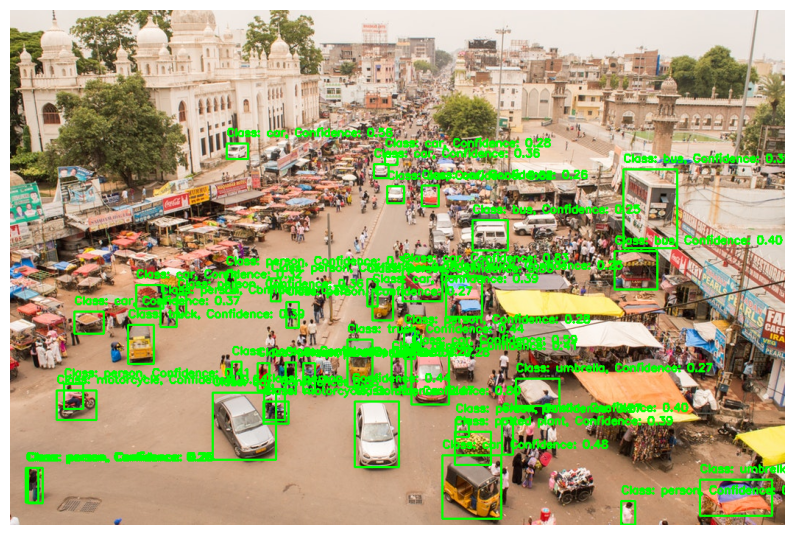

In [12]:
image = cv2.imread(image_path)
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    confidence = round(box.conf[0].item(), 2)
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    x_min, y_min, x_max, y_max = cords
    color = (0, 255, 0)  # Green color for bounding boxes (BGR format)
    thickness = 2       # Thickness of the bounding box lines
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
    label = f'Class: {class_id}, Confidence: {confidence:.2f}'
    cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()